In [3]:
from sklearn.datasets import fetch_openml
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

mnist = fetch_openml('mnist_784')
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995       0       0       0       0       0       0       0       0       0   
 69996       0       0       0       0       0       0       0       0       0   
 69997       0       0       0       0       0       0       0       0       0   
 69998       0       0       0       0       0       0       0       0       0   
 69999       0       0       0       0       0       0       0       0       0   
 
      

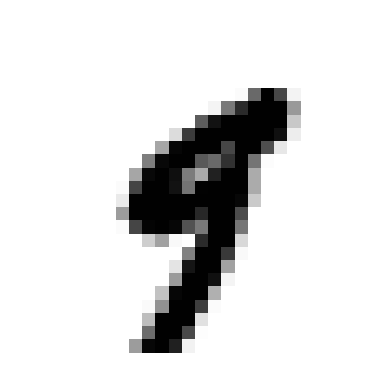

In [9]:
x, y = mnist['data'], mnist['target']

some_digit = x.to_numpy()[36000]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis("off")
plt.show()

In [20]:
x_train, x_test = x[:60000], x[6000:70000]
y_train, y_test = y[:60000], y[6000:70000]
x_train = np.array(x_train)
y_train = np.array(y_train)

shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

# Creating a 2-detector
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train == '2')
y_test_2 = (y_test == '2')


In [22]:
from imblearn.over_sampling import RandomOverSampler

# Balance the classes
ros = RandomOverSampler(random_state=42)
x_train_balanced, y_train_2_balanced = ros.fit_resample(x_train, y_train_2)

# Train the logistic regression classifier on the balanced data
clf = LogisticRegression(tol=0.1)
clf.fit(x_train_balanced, y_train_2_balanced)

# Example prediction
example = clf.predict([some_digit])
print(example)


ValueError: The target 'y' needs to have more than 1 class. Got 1 class instead

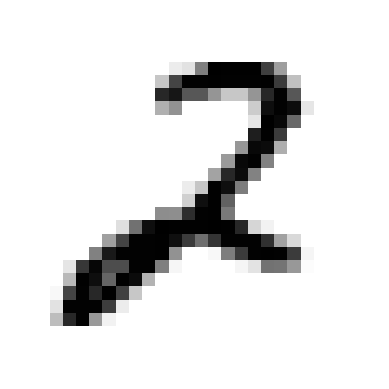

KeyError: "None of [Index([23398, 37220, 25321, 52622,   653,  2328, 29818, 54325, 33505, 46608,\n       ...\n       48151, 11216, 48424, 50487, 28698, 29402,  6390, 18189, 44666,   210],\n      dtype='int32', length=60000)] are in the [columns]"

In [25]:
# fetching dataset
from sklearn.datasets import fetch_openml
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

mnist = fetch_openml('mnist_784')
x, y = mnist['data'], mnist['target']

some_digit = x.to_numpy()[36001]
some_digit_image = some_digit.reshape(28, 28)  # let's reshape to plot it

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary,
           interpolation='nearest')
plt.axis("off")
plt.show()

x_train = np.array(x_train)
y_train = np.array(y_train)
x_train, x_test = x[:60000], x[6000:70000]
y_train, y_test = y[:60000], y[6000:70000]

shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

# Creating a 2-detector
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train == '2')
y_test_2 = (y_test == '2')

# Train a logistic regression classifier
clf = LogisticRegression(tol=0.1)
clf.fit(x_train, y_train_2)
example = clf.predict([some_digit])
print(example)

# Cross Validation
a = cross_val_score(clf, x_train, y_train_2, cv=3, scoring="accuracy")
print(a.mean())
